In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
myplot = lambda x,y,ms,col: plt.scatter(x,y, s=ms*20, edgecolors="k", c=col, lw=2.)
normalize = lambda a: a/np.sum(a)

In [37]:
data = np.load('./manhattan.npz')
bool_exp2 = True
bool_exp3 = False
bakery_pos = data['bakery_pos']
bakery_prod = data['bakery_prod']
cafe_pos = data['cafe_pos']
cafe_prod = data['cafe_prod']
a = bakery_prod
b = cafe_prod
if bool_exp2:
    indexes = np.argsort(bakery_prod)[-5:]
    bakery_pos = bakery_pos[indexes]
    bakery_prod = bakery_prod[indexes]
    a = bakery_prod
X = bakery_pos.T
X /= 1.1 * np.max(X)
if bool_exp3:
    a = np.ones(5)
    b = np.ones(5)
a = normalize(a)
a = a.reshape(-1,1)
Y = cafe_pos.T
Y /= 1.1 * np.max(Y)
b = normalize(b)
b = b.reshape(-1,1)
m = len(b)
n = len(a)

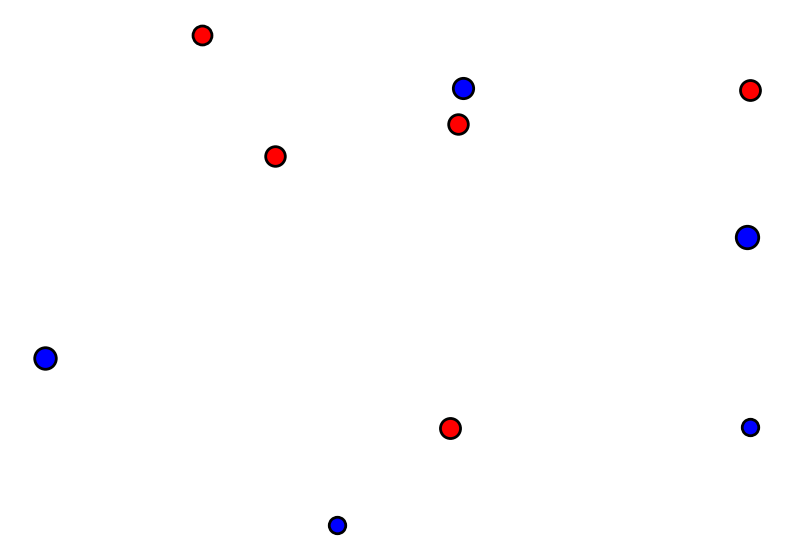

In [38]:
plt.figure(figsize = (10,7))
plt.axis("off")
for i in range(len(a)):
    myplot(X[0,i], X[1,i], a[i]*len(a)*10, 'b')
for j in range(len(b)):
    myplot(Y[0,j], Y[1,j], b[j]*len(b)*10, 'r')
plt.savefig("bakery_cafe.png")
plt.show()

In [39]:
def distmat(x,y):
    return np.sum(x**2,0)[:,None] + np.sum(y**2,0)[None,:] - 2*x.transpose().dot(y)
C = distmat(X,Y)
P = cp.Variable((n,m))
u = np.ones((m,1))
v = np.ones((n,1))
U = [0 <= P, cp.matmul(P,u)==a, cp.matmul(P.T,v)==b]

In [40]:
objective = cp.Minimize( cp.sum(cp.multiply(P,C)) )
prob = cp.Problem(objective, U)
result = prob.solve()

/home/grothendieck/PycharmProjects/NumericalToursOT/venv/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


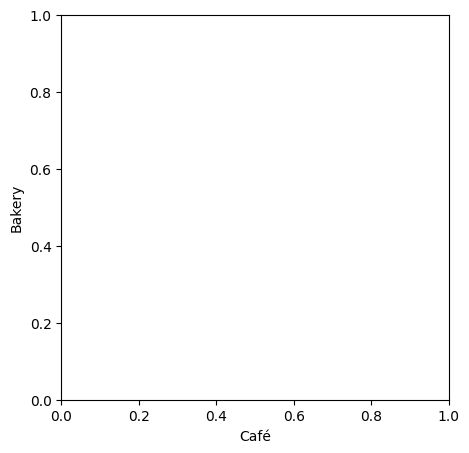

In [41]:
plt.figure(figsize = (5,5))
plt.xlabel("Café")
plt.ylabel("Bakery")
plt.imsave("bakery_cafe_matching_matrix_2.png", P.value)

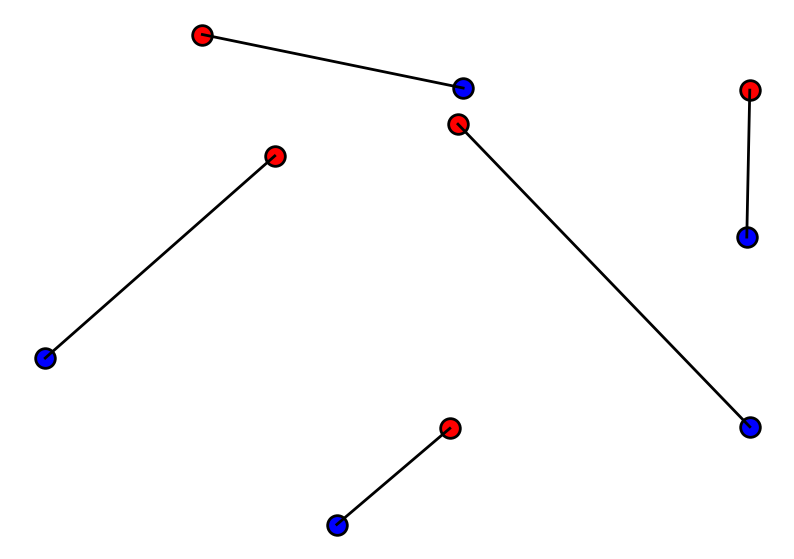

In [33]:
I,J = np.nonzero(P.value>1e-5)
plt.figure(figsize = (10,7))
plt.axis('off')
for k in range(len(I)):
    h = plt.plot(np.hstack((X[0,I[k]],Y[0,J[k]])),np.hstack(([X[1,I[k]], Y[1,J[k]]])),'k', lw = P.value[I[k], J[k]]*10)
for i in range(len(a)):
    myplot(X[0,i], X[1,i], a[i]*len(a)*10, 'b')
for j in range(len(b)):
    myplot(Y[0,j], Y[1,j], b[j]*len(b)*10, 'r')
plt.savefig('bakery_cafe_matching.png')
plt.show()

In [27]:
I,J = np.nonzero(P.value>1e-5)
Pij = P.value[I,J]

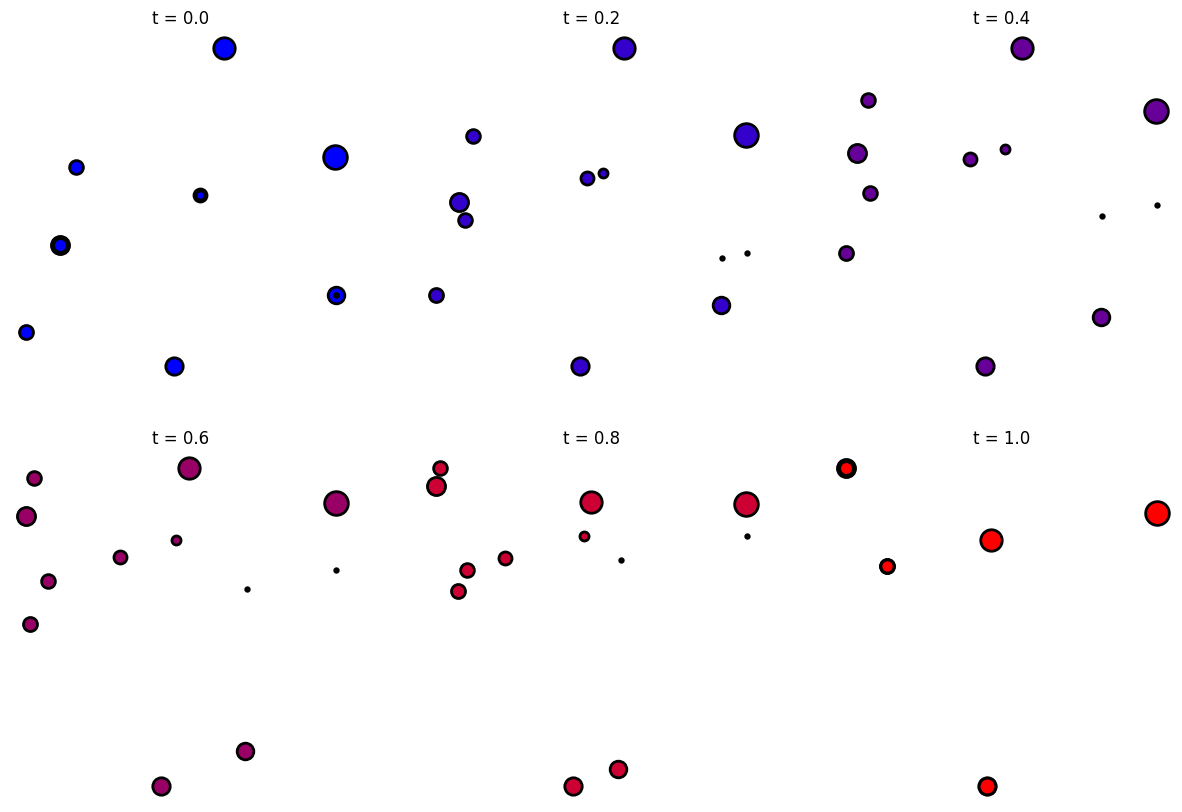

In [13]:
plt.figure(figsize =(15,10))
tlist = np.linspace(0, 1, 6)
for i in range(len(tlist)):
    t = tlist[i]
    Xt = (1-t)*X[:,I] + t*Y[:,J]
    plt.subplot(2,3,i+1)
    plt.axis("off")
    for j in range(len(Pij)):
        myplot(Xt[0,j],Xt[1,j],Pij[j]*len(Pij)*6,[[t,0,1-t]])
    plt.title("t = %.1f" %t)
plt.show()